In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import packages
import numpy as np
import xarray as xr
import xgcm
from matplotlib import pyplot as plt

import sectionate as sec
import regionate as reg

import momlevel as mom
import momgrid

# Don't display filter warnings
import warnings
warnings.filterwarnings("ignore")

# Set figure font size
plt.rcParams.update({'font.size':12})

#from plotting_routines import *    # in regionate


In [5]:
hf_x_384 = xr.open_mfdataset("/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20240508/om5_b04_fixICbug/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_adx.nc")
hf_y_384 = xr.open_mfdataset("/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20240508/om5_b04_fixICbug/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_ady.nc")
T_advection_xy_384 = xr.open_mfdataset("/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20240508/om5_b04_fixICbug/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_advection_xy.nc")


In [4]:
hf_x_382 = xr.open_mfdataset("/archive/John.Krasting/fre_om5/FMS2023.01_om5_20230720/om5_b00_ryf_branch_241/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_adx.nc")
hf_y_382 = xr.open_mfdataset("/archive/John.Krasting/fre_om5/FMS2023.01_om5_20230720/om5_b00_ryf_branch_241/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_ady.nc")
T_advection_xy_382 = xr.open_mfdataset("/archive/John.Krasting/fre_om5/FMS2023.01_om5_20230720/om5_b00_ryf_branch_241/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_advection_xy.nc")


In [9]:
# Here we load data on a (zstr) grid, but the same approach works for any vertical coordinate.

og_384 = xr.open_mfdataset("/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20240508/om5_b04_fixICbug/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ocean_annual_z.static.nc")
ds_384 = xr.Dataset() 
ds_384 = xr.merge([ds_384, hf_x_384, hf_y_384, T_advection_xy_384])

ds_384 = ds_384.assign_coords({
    'geolon': xr.DataArray(og_384['geolon'].values, dims=('yh','xh')),
    'geolat': xr.DataArray(og_384['geolat'].values, dims=('yh','xh')),
    'geolon_c': xr.DataArray(og_384['geolon_c'].values, dims=('yq','xq')),
    'geolat_c': xr.DataArray(og_384['geolat_c'].values, dims=('yq','xq')),
    'deptho': xr.DataArray(og_384['deptho'].values, dims=('yh', 'xh',)),
}) # add velocity face widths to calculate distances along the section


coords={
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'inner': 'z_l', 'outer': 'z_i'}
}
grid_384 = xgcm.Grid(ds_384, coords=coords, boundary={"X":"periodic", "Y":"periodic", "Z":"extend"}, autoparse_metadata=False)

# look for the heat content budget equation? 
rho0 = 1035. # kg/m^3 seawater density
Cp = 3992. # J/kg/K   specific heat capacity of seawater

In [10]:
# Here we load data on a (zstr) grid, but the same approach works for any vertical coordinate.

og_382 = xr.open_mfdataset("/archive/John.Krasting/fre_om5/FMS2023.01_om5_20230720/om5_b00_ryf_branch_241/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ocean_annual_z.static.nc")
ds_382 = xr.Dataset() 
ds_382 = xr.merge([ds_382, hf_x_382, hf_y_382, T_advection_xy_382])

ds_382 = ds_382.assign_coords({
    'geolon': xr.DataArray(og_382['geolon'].values, dims=('yh','xh')),
    'geolat': xr.DataArray(og_382['geolat'].values, dims=('yh','xh')),
    'geolon_c': xr.DataArray(og_382['geolon_c'].values, dims=('yq','xq')),
    'geolat_c': xr.DataArray(og_382['geolat_c'].values, dims=('yq','xq')),
    'deptho': xr.DataArray(og_382['deptho'].values, dims=('yh', 'xh',)),
}) # add velocity face widths to calculate distances along the section


coords={
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'inner': 'z_l', 'outer': 'z_i'}
}
grid_382 = xgcm.Grid(ds_382, coords=coords, boundary={"X":"periodic", "Y":"periodic", "Z":"extend"}, autoparse_metadata=False)

# look for the heat content budget equation? 
rho0 = 1035. # kg/m^3 seawater density
Cp = 3992. # J/kg/K   specific heat capacity of seawater

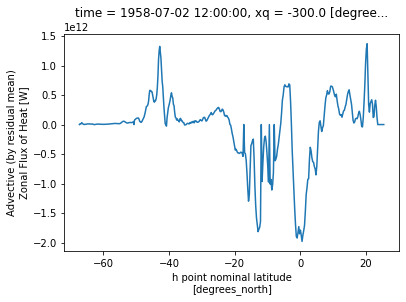

In [11]:
hf_x_384.T_adx[0,0,:,0].plot()

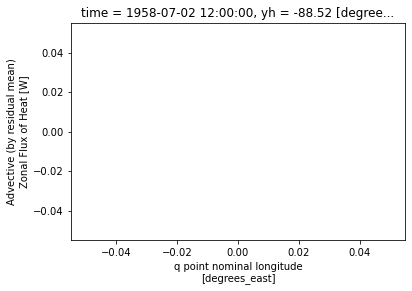

In [12]:
hf_x_384.T_adx[0,0,0,:].plot()

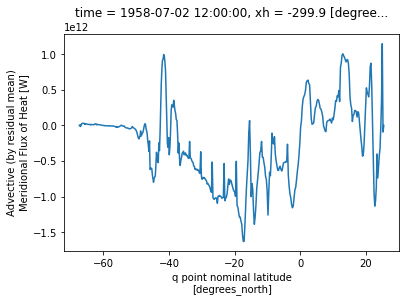

In [13]:
hf_y_384.T_ady[0,0,:,0].plot()

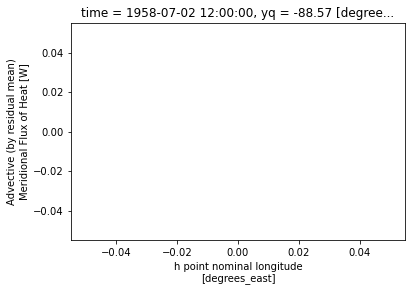

In [14]:
hf_y_384.T_ady[0,0,0,:].plot()

In [15]:
hf_x_384.T_adx[0,0,0,:].values

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [16]:
x = grid_384.diff(hf_x_384.T_adx, "X")
x.shape

(65, 35, 1161, 1440)

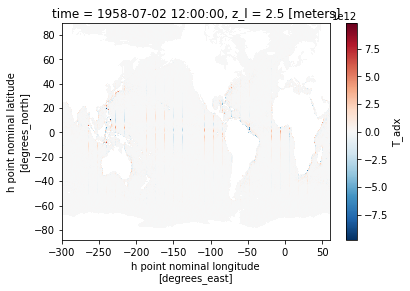

In [17]:
x[0,0,:,:].plot()

In [18]:
y = grid_384.diff(hf_y_384.T_ady, "Y")
y.shape

(65, 35, 1161, 1440)

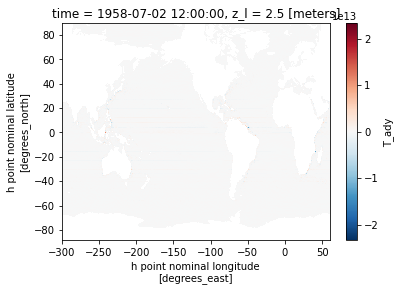

In [19]:
y[0,0,:,:].plot()

In [20]:
x_sel = momgrid.geoslice.geoslice(x, x=(-100,-50), y=(0,30))
x_sel.shape

(65, 35, 126, 200)

In [21]:
y_sel = momgrid.geoslice.geoslice(y, x=(-100,-50), y=(0,30))
y_sel.shape

(65, 35, 126, 200)

In [22]:
convergent_heat_transport_gw_384 = x_sel.mean('time').sum('z_l') + y_sel.mean('time').sum('z_l')
convergent_heat_transport_gw_384.values

array([[ 3.2178962e+10, -1.3996989e+11, -1.0715234e+11, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.7348061e+11,  3.3117549e+11,  3.0620313e+11, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 8.8730173e+10,  8.8184521e+10,  8.7621042e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.6503060e+09,  3.5542467e+09,  3.7014077e+09],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.4161623e+09,  6.1265412e+10,  3.6938711e+09],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.5348152e+09,  3.5472343e+09,  4.7783346e+10]], dtype=float32)

In [23]:
og_384_sel = momgrid.geoslice.geoslice(og_384, x=(-100,-50), y=(0,30))
og_384_sel.areacello.shape

(126, 200)

In [24]:
advective_ht_384 = (ds_384['T_advection_xy']*og_384_sel['areacello']).mean('time').sum('z_l')
advective_ht_sel_384 = momgrid.geoslice.geoslice(advective_ht_384, x=(-100,-50), y=(0,30))
advective_ht_sel_384.values

array([[-1.0385302e+11, -1.0332292e+11, -1.0275102e+11, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.7346871e+10, -9.6828965e+10, -9.6298385e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.8730051e+10, -8.8184603e+10, -8.7620813e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.9385370e+09, -3.6842642e+09, -3.7105111e+09],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.8809293e+09, -3.6503194e+09, -3.5541811e+09],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.7496873e+09, -3.4161592e+09, -3.4428324e+09]], dtype=float32)

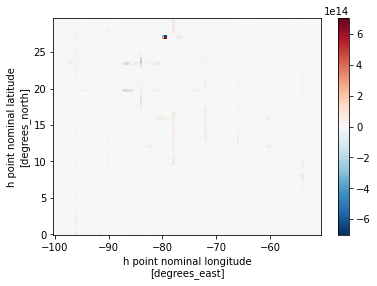

In [25]:
diff = advective_ht_sel_384 - convergent_heat_transport_gw_384
diff.plot()

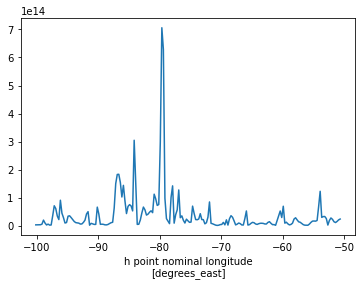

In [26]:
diff.max('yh').plot()

In [27]:
x_382 = grid_382.diff(hf_x_382.T_adx, "X")
y_382 = grid_382.diff(hf_y_382.T_ady, "Y")

In [28]:
x_382_sel = momgrid.geoslice.geoslice(x_382, x=(-100,-50), y=(0,30))
y_382_sel = momgrid.geoslice.geoslice(y_382, x=(-100,-50), y=(0,30))

In [29]:
convergent_heat_transport_gw_382 = x_382_sel.mean('time').sum('z_l') + y_382_sel.mean('time').sum('z_l')
convergent_heat_transport_gw_382.values

array([[9.68459551e+10, 9.60086016e+10, 1.00826415e+11, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.99426550e+10, 8.91707064e+10, 8.83729367e+10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.15501148e+10, 8.07994491e+10, 7.99959941e+10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.25440563e+09, 1.91863194e+09, 7.80061901e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.22171699e+09, 4.71835279e+10, 2.41502618e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.56997786e+09, 2.72611738e+09, 2.75765658e+09]], dtype=float32)

In [30]:
og_382_sel = momgrid.geoslice.geoslice(og_382, x=(-100,-50), y=(0,30))
og_382_sel.areacello.shape

(126, 197)

In [31]:
advective_ht_382 = (ds_382['T_advection_xy']*og_382_sel['areacello']).mean('time').sum('z_l')
advective_ht_sel_382 = momgrid.geoslice.geoslice(advective_ht_382, x=(-100,-50), y=(0,30))
advective_ht_sel_382.values

array([[-9.6845808e+10, -9.6008454e+10, -9.5225176e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.9951756e+10, -8.9170805e+10, -8.8372543e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.1550246e+10, -8.0799416e+10, -7.9995937e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.1637673e+09, -2.4922081e+09, -2.6308298e+09],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.1462198e+09, -2.2543918e+09, -2.3584271e+09],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.3989783e+09, -2.3609999e+09, -2.4016707e+09]], dtype=float32)

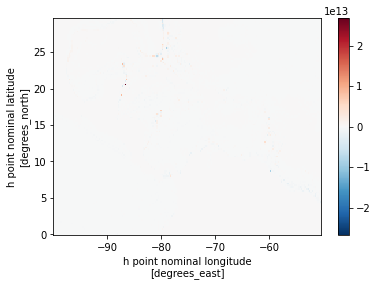

In [32]:
diff_382 = advective_ht_sel_382 - convergent_heat_transport_gw_382
diff_382.plot()

In [33]:
lons_384 = np.array([-87.1, -84, -74.2, -73.1, -68.2, -67., -65.4, -62.5, -61.2, -61., -60.5, -61.4, -71.3, -71.4, -77.5, -94])
lats_384 = np.array([21., 22.2, 20.1, 19.4, 18.2, 18.1, 18.2, 17.2, 16.2, 14.3, 13.5, 12., 10.4, 10.4, 7.4, 17.4])
region_384 = reg.GriddedRegion("Lesser Antilles", lons_384, lats_384, grid_384)


In [34]:
lons_382 = np.array([-87.1, -84, -74.2, -73.1, -68.2, -67., -65.4, -62.5, -61.2, -61., -60.5, -61.4, -71.3, -71.4, -77.5, -94])
lats_382 = np.array([21., 22.2, 20.1, 19.4, 18.2, 18.1, 18.2, 17.2, 16.2, 14.3, 13.5, 12., 10.4, 10.4, 7.4, 17.4])
region_382 = reg.GriddedRegion("Lesser Antilles", lons_382, lats_382, grid_382)

In [35]:
geolon_c_382 = momgrid.geoslice.geoslice(ds_382.geolon_c, x=(-100,-50), y=(0,30))
geolon_c_382.shape

(126, 197)

In [36]:
geolat_c_382 = momgrid.geoslice.geoslice(ds_382.geolat_c, x=(-100,-50), y=(0,30))
geolat_c_382.shape

(126, 197)

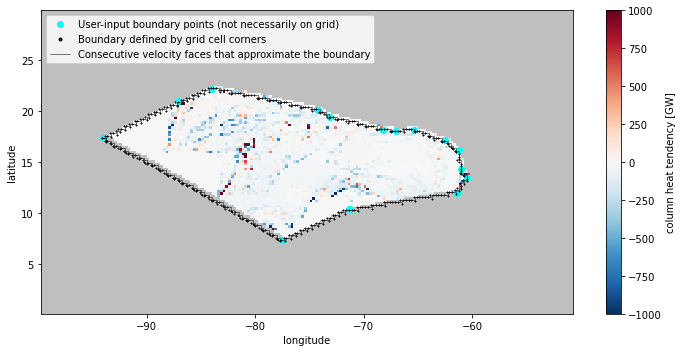

In [40]:
# subset Caribbean regyions 

plt.figure(figsize=(10, 5))
plt.subplot(facecolor=(0.75, 0.75, 0.75))
pc = plt.pcolormesh(
        geolon_c_382,
        geolat_c_382,
        diff_382.where(region_382.mask)*1e-9,
        alpha=1.0, cmap="RdBu_r", vmin=-1e+3, vmax=1e+3
)

#pc_dep = geoplot(ds_382, og_382_sel.deptho.where(~region_382.mask), cmap="viridis_r")
plt.plot(lons_382, lats_382, "C3o", color='cyan', markersize=6, label="User-input boundary points (not necessarily on grid)")
plt.plot([],[],"k.",label="Boundary defined by grid cell corners")
plt.plot(reg.loop(region_382.lons), reg.loop(region_382.lats), "k-", linewidth=0.5, label="Consecutive velocity faces that approximate the boundary")
plt.plot(region_382.lons_uv, region_382.lats_uv, "k+", markersize=2.)
#plt.colorbar(pc_dep, label="depth [m]")
plt.colorbar(pc, label="column heat tendency [GW]")
plt.legend(loc = "upper left", fontsize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()

In [38]:
geolon_c_384 = momgrid.geoslice.geoslice(ds_384.geolon_c, x=(-100,-50), y=(0,30))
geolat_c_384 = momgrid.geoslice.geoslice(ds_384.geolat_c, x=(-100,-50), y=(0,30))
geolon_c_384.shape

(126, 200)

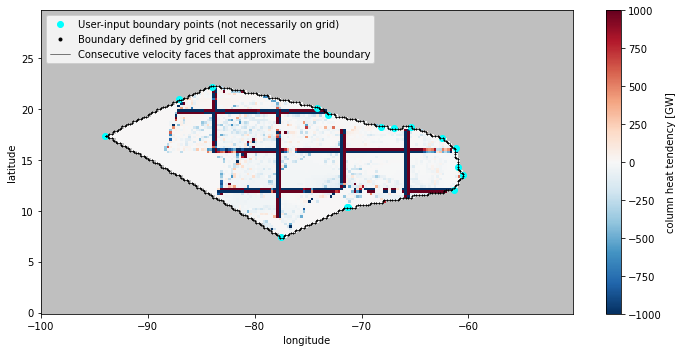

In [39]:
# subset Caribbean regyions 

plt.figure(figsize=(10, 5))
plt.subplot(facecolor=(0.75, 0.75, 0.75))
pc = plt.pcolormesh(
        geolon_c_384,
        geolat_c_384,
        diff.where(region_384.mask)*1e-9,
        alpha=1.0, cmap="RdBu_r", vmin=-1e+3, vmax=1e+3
)

#pc_dep = geoplot(ds_382, og_382_sel.deptho.where(~region_382.mask), cmap="viridis_r")
plt.plot(lons_384, lats_384, "C3o", color='cyan', markersize=6, label="User-input boundary points (not necessarily on grid)")
plt.plot([],[],"k.",label="Boundary defined by grid cell corners")
plt.plot(reg.loop(region_384.lons), reg.loop(region_384.lats), "k-", linewidth=0.5, label="Consecutive velocity faces that approximate the boundary")
plt.plot(region_384.lons_uv, region_384.lats_uv, "k+", markersize=2.)
#plt.colorbar(pc_dep, label="depth [m]")
plt.colorbar(pc, label="column heat tendency [GW]")
plt.legend(loc = "upper left", fontsize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()